# How Low can you Flow- Analyzing Floodplain Connectivity in Boulder County
![Watershed Project](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/South_Boulder_Creek_%28Colorado%29.JPG/1920px-South_Boulder_Creek_%28Colorado%29.JPG)

*Img source: 
Wikimedia Foundation. (2022, September 4). South Boulder creek (Colorado). Wikipedia. https://en.wikipedia.org/wiki/South_Boulder_Creek_(Colorado)

### Collaborators and Acknowledgements
Lindsay Chipman, Julia Sobczak, Matthew Bitters, and [The Watershed Center](https://watershed.center/)

Final project for the University of Colorado Earth Data Analytics Professional Certificate, special thanks to the [Earth Lab](https://www.earthdatascience.org/) and Dr. Elsa Culler



## What is "floodplain connectivity"?
A **floodplain** is the area adjacent to a stream that becomes inundated with water when a flood occurs. This space allows the flood to "spread out" and release energy and suspended objects (such as sediment, logs, and branches). By reducing the flow of water down the stream corridor, floodplains effectively mitigate destruction to buildings and other infrastructure downstream. 

BUT this can only happen if the floodplain is "available" to the stream i.e., if the area around the stream is low enough to actually be affected when floodwaters appear. If a floodplain is situated above the highest flow of water, it will not be inundated with water and the floodplain will not act as it should - we call this a **disconnected** floodplain.


In other words, a **connected** floodplain is an area near the stream that can accept floodwaters and act as a buffer to potentially dangerous flows down the stream corridor.

## Floodplains save lives...and help ecosystems!
When a stream overflows onto its floodplain, it aids ecosystem services that can help save lives and increase habitat resiliency to destructive flooding events.

Floodplains...
* Disperse the force of a flood, which reduces destruction to mand-made structures along the stream
* Maintain water quality by reducing sediment/fine particles flowing downstream
* Reduce erosion via plants and plant roots growing along the banks (encouraged by nutrients from floodwaters)
* Create many paths for water to flow, like side channels and ponds
* Capture higher levels of carbon due on the physical properties of wetland soil
* Create a uniqe habitat for wetland plants and animals which help air-land-water interactions

In [1]:
# Import packages
# Make sure you have RiverREM imported, check readme for instructions
import os
import pathlib

import matplotlib.pyplot as plt
from load_plot_model import load_dtm, plot_model, plot_hist
from riverrem.REMMaker import REMMaker, clear_osm_cache
import requests
import rioxarray as rxr

In [2]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'watershed-project')

# Try/Except Block   
try:
    os.chdir(working_dir)
except:
    print('{} does not exist. Creating...'.format(working_dir))
    os.makedirs(working_dir)
    os.chdir(working_dir)
else:
    print('{} is now the working directory'.format(working_dir))

/Users/lchipman/earth-analytics/data/watershed-project is now the working directory


## Study Area: St. Vrain Watershed (Boulder, CO)
Our study sites are located in the St. Vrain Watershed located in the northwest foothills of Colorado, USA. This is a heavily populated area (stats) with beautiful views and lots of opportunity for outdoor recreation including hiking, kayaking, and mountain biking. 

We analyzed five study sites in the St. Vrain Watershed (light blue): Apple Valley, Hall Meadows, Highway 93, Legacy 1, and Van Vleet.

In [ ]:
from plot_site_map import plot_sites, plot_sites_folium

# Plot the study sites, method 2 - find related code in plot_site_map
plot_sites_folium()

# Using elevation models to evaluate floodplain connectivity

A **Digital Terrain Model (DTM)** is a representation of the topographic surface of the Earth excluding trees, buildings, and any other surface objects. We obtained images of the study sites from drones or **Unmanned Aerial Vehicles (UAV)** that the Watershed Center flew in 2022. From these UAV images, we created DEMs using the software [Agisoft Metashape.](https://www.agisoft.com/), which performs photogrammetric processing of digital images to generate 3D spatial data. 

In [3]:
# Define urls for UAV model data downloads
# Starting with hwy 93, but repeat with new sites as data is added
highway93_dtm_url = ('https://zenodo.org/record/8218054/files/'
                     'highway93_uav_dtm.tif?download=1')
highway93_rem_url = ('https://zenodo.org/record/8218054/files/'
                     'highway93_uav_rem.tif?download=1')
applevalley_dtm_url = ('https://zenodo.org/record/8218054/files/'
                       'applevalley_uav_dtm.tif?download=1')
applevalley_rem_url = ('https://zenodo.org/record/8218054/files/'
                       'applevalley_uav_rem.tif?download=1')
hallmeadows_dtm_url = ('https://zenodo.org/record/8218054/files/'
                       'hallmeadows_uav_dtm.tif?download=1')
hallmeadows_rem_url = ('https://zenodo.org/record/8218054/files/'
                       'hallmeadows_uav_rem.tif?download=1')

# Create dataarrays of rems and dtms for 3 sites
highway93_uav_dtm = load_dtm(data_url = highway93_dtm_url, 
                          site_name = 'highway93',
                          file_name = 'highway93_dtm.tif')
highway93_uav_rem = load_dtm(data_url = highway93_rem_url, 
                          site_name = 'highway93',
                          file_name = 'highway93_rem.tif')
applevalley_uav_dtm = load_dtm(data_url = applevalley_dtm_url, 
                          site_name = 'applevalley',
                          file_name = 'applevalley_dtm.tif')
applevalley_uav_rem = load_dtm(data_url = applevalley_rem_url, 
                          site_name = 'applevalley',
                          file_name = 'applevalley_rem.tif')
hallmeadows_uav_dtm = load_dtm(data_url = hallmeadows_dtm_url, 
                          site_name = 'hallmeadows',
                          file_name = 'hallmeadows_dtm.tif')
hallmeadows_uav_rem = load_dtm(data_url = hallmeadows_rem_url, 
                          site_name = 'hallmeadows',
                          file_name = 'hallmeadows_rem.tif')

In [4]:
# Lists of UAV DTMs and REMs
uav_dtm_list = [highway93_uav_dtm, 
                applevalley_uav_dtm, 
                hallmeadows_uav_dtm]

uav_rem_list = [highway93_uav_rem, 
                applevalley_uav_rem, 
                hallmeadows_uav_rem]

In [ ]:
# Plot example DTM - can add more sites, but takes a long time to run
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_model(model = applevalley_uav_dtm, 
           title = 'DTM of the Apple Valley Site', 
           coarsen = True,
           ax =ax)

The image above shows an example of a **DTM** for the Apple Valley site. The color bar on the right shows the elevation in meters above sea level. The main channel is visible as the lowest elevations, and other features, such as a small pond to the east of the channel are also visible.

# Shift model relative to the streambed

We then used the UAV-derived DTMs to generate **Relative Elevation Models (REMs)**, which are DTMs normalized to the stream channel, using two methods:
1) [REM Generator Tool](https://drive.google.com/drive/folders/1qcsaKrh-NPplq4P3escRgNW6mokA_QLL). This is a free tool available from the [Colorado Water Conservation Board's Colorado Fluvial Hazard Zone Program](https://www.coloradofhz.com/). However, it requires an [ArcGIS](https://www.esri.com/en-us/arcgis/products/arcgis-desktop/overview) license to run.
2) [REMMaker](https://github.com/OpenTopography/RiverREM/blob/main/riverrem/REMMaker.py) tool available on github at [RiverREM](https://github.com/OpenTopography/RiverREM/tree/main). This is an open-source python tool.

In [5]:
# Function to run REMMaker with UAV dtms - move to .py
def run_rem_maker(site_name, k=100):
    """Function to run the REMMaker tool on UAV DTMs
    
    Parameters
    -----------
    site_name: str
        Name of the site with existing DTM.
    k: int
        Number of interpolation points.
        
    Returns
    ----------
    '{site_name}_dtm_REM.tif': image saved locally
        REM image file.
    """
    
    # Input the DTM file path and desired output directory
    override_cache = False
    uav_dtm_path = os.path.join(site_name, ('{}_dtm.tif').format(site_name))
    uav_out_dir = os.path.join(site_name, 'remmaker')
    if (not os.path.exists(uav_out_dir)) or override_cache:
            print('{} does not exist. Downloading...'.format(uav_out_dir))
            os.makedirs(uav_out_dir)
    uav_rem_path = os.path.join(uav_out_dir, 
                                  ('{}_dtm_REM.tif').format(site_name))

    # Run the REMMaker if the path to the REM does not already exist
    if (not os.path.exists(uav_rem_path)) or override_cache:
        rem_maker = REMMaker(dem=uav_dtm_path, 
                             out_dir=uav_out_dir, 
                             interp_pts=1000, 
                             k=100)

        # clear OSM cache
        clear_osm_cache()

        # create an REM
        rem_maker.make_rem()

        # create an REM visualization with the given colormap
        rem_maker.make_rem_viz(cmap='mako_r')

    else:
        print('The REM already exists. Not running REMMaker')

In [6]:
# Create UAV REM for three sites with run_rem_maker function
# Check on this - the list has nan values, but the .tif files show the correct images
site_names = ('highway93', 'applevalley', 'hallmeadows')
uav_riverrem_list = []

for site in site_names:
    run_rem_maker(site_name=site, k=100)
    uav_rem_path = os.path.join(site, 'remmaker', ('{}_dtm_REM.tif').format(site))
    uav_rem = rxr.open_rasterio(uav_rem_path, masked=True)    
    uav_riverrem_list.append(uav_rem)

The REM already exists. Not running REMMaker
The REM already exists. Not running REMMaker
The REM already exists. Not running REMMaker


# Visualizing the Results - REM Plots

Below are plots of the **REMs** for three sites generated with the REMMaker Tool. The plots show the elevation relative to the stream channel. The color bar on the right shows the elevation in meters above the streambed. Small changes in elevation represent changes in the topography or fluvial landform. The plots reveal older channels that are no longer the main channel as the morphology has shifted over time but may still retain water during flooding.

In [ ]:
# Plot the UAV REMs for 3 sites - this takes a long time to run
fig, axes = plt.subplots(3, 1, figsize=(12, 14))
plot_title = ['UAV-Derived REM for Highway 93', 
              'UAV-Derived REM for Apple Valley', 
              'UAV-Derived REM for Hall Meadows']
for i, axe in enumerate(axes.flatten()):
    plot_model(
        model=uav_rem_list[i],
        title=plot_title[i],
        coarsen=(True),
        ax=axe)

# Visualize the Resuts - Histograms¶

Histograms show the frequency (count, y0axis) of each elevation (meters, x-axis). A smoother histogram may indicate greater connectivity whereas sharp changes in elevations may indicate a disconnected floopdplain. We can also compare histograms for the REMs created by the [REM Generator Tool](https://drive.google.com/drive/folders/1qcsaKrh-NPplq4P3escRgNW6mokA_QLL) (in ArcMap) versus those for the REMs created with the [REMMaker](https://github.com/OpenTopography/RiverREM/blob/main/riverrem/REMMaker.py) tool (in python).

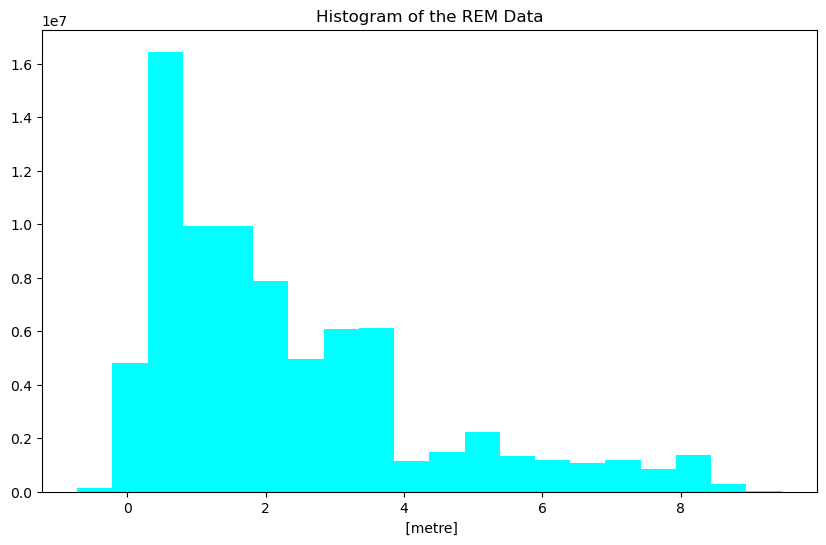

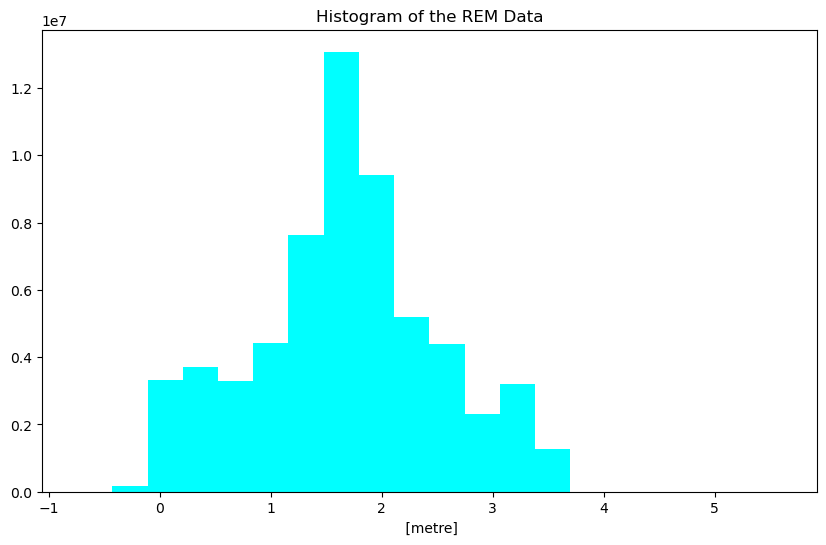

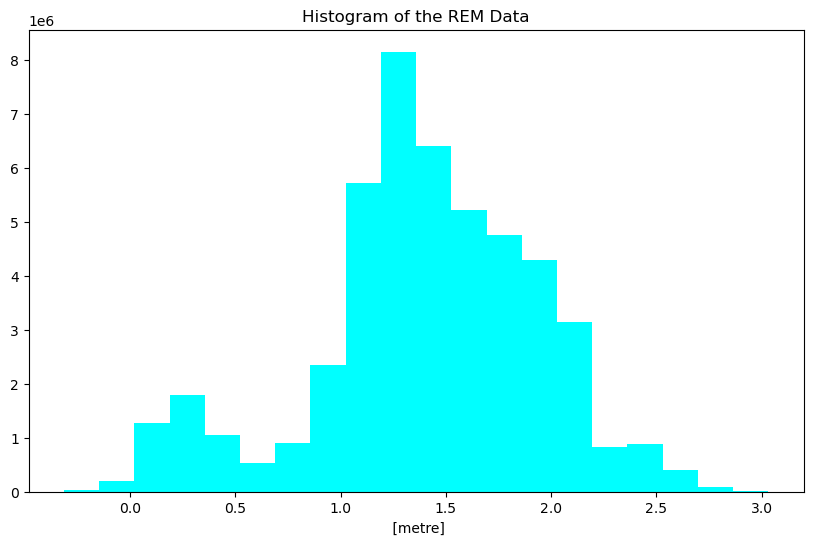

In [15]:
# Call function to plot histogram of UAV REMs
    
for rem in uav_rem_list:
    plot_hist(model=rem, 
              title="Histogram of the REM Data", 
              color="cyan")

## Export Notebook to HTML File

In [ ]:
# Move to the local repository directory where this notebook is saved
repo_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'watershed-project')
try:
    os.chdir(repo_dir)
except:
    print('{} does not exist. Please make sure you forked the watershed'
          'repository to the correct location. See README' 
          'for instructions'.format(repo_dir))
else:
    print('Changed directory to {}'.format(repo_dir))
    !jupyter nbconvert --to html --no-input watershed_project_summer23.ipynb